### Homework due April 3

Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()` just like you did with the fashion MNIST. 

See if you can get over 98% accuracy in your prediction!

Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

#### This model can follow fairly closely to what you did with Fashion MNIST - but make sure to explore some paramter options and different network architectures. Remember with bit data sets it can take a while to train so my might want to be careful about the number of neurons and number of epochs during training. Give yourself plenty of time!

### Ideally you will show

- A simple attempt that follows almost exactly Fashion MNIST followed by some comments about what happened, your accuracy, and what you might try.

- A next attempt that has some improvement followed by some comments about what you changed and why that improved you accuracy.

- At least one more attempt that shows your best run followed by some comments about what worked and how close you got to the 98% accuracy that was the goal.

In [1]:
import tensorflow as tf
from tensorflow import keras

# To plot pretty figures - run this cell
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import numpy as np
import pandas as pd
import sklearn


Bad key "text.kerning_factor" on line 4 in
C:\Users\samsi\Anaconda3\envs\hello-tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Get the data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Similar to the clothes data set we worked with in the previous homework assignment, the original MNIST data set needs to be broken up into training, testing, AND validation data sets.  We can divide each pixel by 255 as a form of scaling.  

In [3]:
X_valid, X_train = X_train_full[:5000]/ 255.0, X_train_full[5000:]/ 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

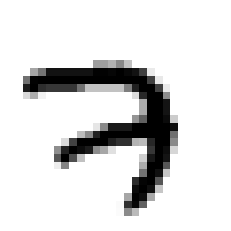

In [4]:
# Use the command below to look at some of the training images
image_num = 0
plt.imshow(X_train[image_num], cmap="binary") #imshow shows the image of the number from the training data.
plt.axis('off') #No axis.
plt.show()

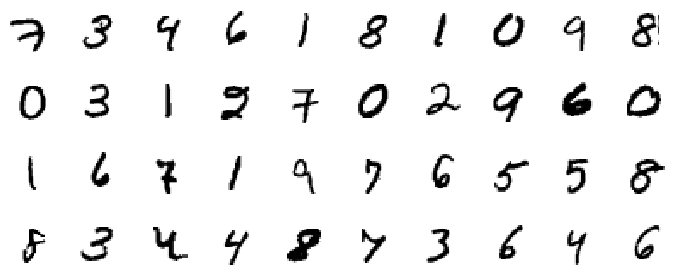

In [5]:
# Take a look at some of the items in the data set - run the cell and comment on what it does
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
#This cell plots the different figures from the X and y data.

With the data ready, my first attempt at a CNN model was to use the sequential model we used on the clothes data set.

In [6]:
# Build the architecture of the Neural Net
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [7]:
# Look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Explore the initialization of the weights and biases = theta values 
model.layers

In [9]:
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer('dense') is hidden1

weights, biases = hidden1.get_weights()


dense


In [10]:
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.07132331 -0.00477475  0.05420935 ... -0.01534936 -0.00647957
  -0.00552433]
 [-0.02562542 -0.03396079  0.05146456 ...  0.04579569 -0.00800504
   0.06015192]
 [ 0.04743526  0.05263165 -0.03448774 ... -0.03068328  0.02425513
   0.01439826]
 ...
 [ 0.00521842  0.00032159  0.04479306 ...  0.05882905  0.03251682
  -0.06278739]
 [ 0.02952199 -0.06204554  0.05814548 ...  0.01222362 -0.03847688
   0.00948408]
 [-0.00239413 -0.03635501  0.05191535 ...  0.03657501 -0.04779862
  -0.03254362]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [11]:
# Now compile the model:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

In [12]:
# Give the model our training and validation data for training - this takes a bit of time to run
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.6204 - accuracy: 0.8388 - val_loss: 0.3187 - val_accuracy: 0.9098
Epoch 2/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.2893 - accuracy: 0.9173 - val_loss: 0.2429 - val_accuracy: 0.9312
Epoch 3/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.2351 - accuracy: 0.9330 - val_loss: 0.2077 - val_accuracy: 0.9438
Epoch 4/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.2005 - accuracy: 0.9423 - val_loss: 0.1747 - val_accuracy: 0.9518
Epoch 5/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.1741 - accuracy: 0.9500 - val_loss: 0.1561 - val_accuracy: 0.9582
Epoch 6/30
55000/55000 [==============================] - 3s 62us/sample - loss: 0.1539 - accuracy: 0.9553 - val_loss: 0.1446 - val_accuracy: 0.9610
Epoch 7/30
55000/55000 [==============================] -

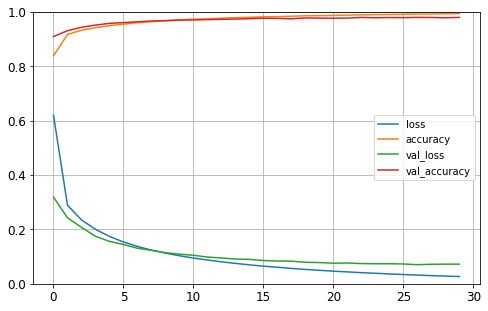

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[13.029294591916003, 0.9762]


In [13]:
# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Check the accuracy of the model
print(model.evaluate(X_test, y_test))

The accuracy using this model is 0.9762.  This is relatively good, but the goal is to get above 98%. The first thing I'll try to do to make a better model is to increase the amount of neurons and add another dense layer.  I also increased the number of epochs because perhaps the more the model trains, the better the accuracy.

In [ ]:
# Build the architecture of the Neural Net
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(200, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# Look at the model summary
model.summary()

# Explore the initialization of the weights and biases = theta values 
model.layers

'''
hidden1 = model.layers[1]
print(hidden1.name)
model.get_layer('dense') is hidden1

weights, biases = hidden1.get_weights()

print(weights)
print(weights.shape)
print(biases)
print(biases.shape)
'''

# Now compile the model:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

# Give the model our training and validation data for training - this takes a bit of time to run
history = model.fit(X_train, y_train, epochs = 40,
                   validation_data = (X_valid, y_valid))

# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Check the accuracy of the model
print(model.evaluate(X_test, y_test))

I recieved an accuracy of 97.72%, only slightly better than my last model.  Using the keras layer index, https://keras.io/layers/convolutional/ , it appears that there are specific layers such as `Conv2D` that deals with image recognition.  I tried this multiple times and kept recieving errors when trying to find history or checking accuracy with the validation data, so I ended up using this link: https://towardsdatascience.com/implementing-different-activation-functions-and-weight-initialization-methods-using-python-c78643b9f20f , and tried other activation functions.  Activation function to be used for learning non-linear decision boundary include `tanh` so Im gonna add another layer and see if it helps the model.

In [ ]:
# Build the architecture of the Neural Net
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(200, activation = "tanh"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# Look at the model summary
model.summary()

# Explore the initialization of the weights and biases = theta values 
model.layers

# Now compile the model:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

# Give the model our training and validation data for training - this takes a bit of time to run
history = model.fit(X_train, y_train, epochs = 40,
                   validation_data = (X_valid, y_valid))

# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Check the accuracy of the model
print(model.evaluate(X_test, y_test))


Now, out model is at 96.94% accuracy, so even worse :(

In [ ]:
# Build the architecture of the Neural Net
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(600, activation = "relu"))
model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

# Look at the model summary
model.summary()

# Explore the initialization of the weights and biases = theta values 
model.layers

# Now compile the model:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

# Give the model our training and validation data for training - this takes a bit of time to run
history = model.fit(X_train, y_train, epochs = 50,
                   validation_data = (X_valid, y_valid))

# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Check the accuracy of the model
print(model.evaluate(X_test, y_test))

97.76% accuracy

## 98% Accurate Model

I increased the number of neurons, where the model should learn smaller details and become more adaptive.  This will also increase the amount of hidden layers.  Recieved 98.03% accuracy with softmax 20, and an accuracy of 97.77% with softmax 30, therefore I will keep at it 20.  Next I increased the amount of the first neuron from 800 to 900 and got under 98%, so I kept the first layer at 800 neurons. I then increased the last relu layer to 200 and i got a lower accuracy. 

NOTE: I GOT 98.03 AND WHEN I RERAN IT, IT GOT LOWER????

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_58 (Dense)             (None, 600)               480600    
_________________________________________________________________
dense_59 (Dense)             (None, 400)               240400    
_________________________________________________________________
dense_60 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_61 (Dense)             (None, 20)                2020      
Total params: 1,391,120
Trainable params: 1,391,120
Non-trainable params: 0
___________________________________________

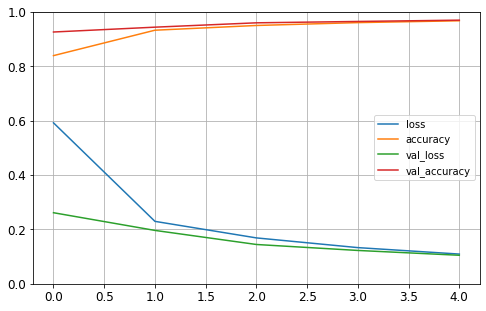

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[16.271949643588062, 0.9661]


In [17]:
# Build the architecture of the Neural Net
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(800, activation = "relu"))
model.add(keras.layers.Dense(600, activation = "relu"))
model.add(keras.layers.Dense(400, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(20, activation = "softmax"))



# Look at the model summary
model.summary()

# Explore the initialization of the weights and biases = theta values 
model.layers

# Now compile the model:
model.compile(loss = "sparse_categorical_crossentropy", 
             optimizer = "sgd",
             metrics = ["accuracy"])

# Give the model our training and validation data for training - this takes a bit of time to run
history = model.fit(X_train, y_train, epochs = 35,
                   validation_data = (X_valid, y_valid))

# Plot the training history
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Check the accuracy of the model
print(model.evaluate(X_test, y_test))

## ATTEMPT AT DIFFERENT LAYERS BUT I FAILED

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape = [28,28,1]))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(35, activation='softmax'))

# training
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

In [ ]:
# Give the model our training and validation data for training - this takes a bit of time to run
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid))

In [ ]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape= [28,28, 1]))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=30,
          verbose=1,
          validation_data=(X_train, y_train))